In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')

<Figure size 1152x648 with 0 Axes>

In [4]:
df= pd.read_csv(r'C:\Users\91998\Downloads\2019.csv')

In [5]:
df.sample()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118


In [6]:
df.shape

(156, 9)

In [7]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [8]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of Overall rank is int64 and no of unique values are 156
 
  data types of Country or region is object and no of unique values are 156
 
  data types of Score is float64 and no of unique values are 155
 
  data types of GDP per capita is float64 and no of unique values are 146
 
  data types of Social support is float64 and no of unique values are 145
 
  data types of Healthy life expectancy is float64 and no of unique values are 119
 
  data types of Freedom to make life choices is float64 and no of unique values are 130
 
  data types of Generosity is float64 and no of unique values are 118
 
  data types of Perceptions of corruption is float64 and no of unique values are 113
 


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [10]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()/len(df)*100

Overall rank                    0.0
Country or region               0.0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: float64

<AxesSubplot:>

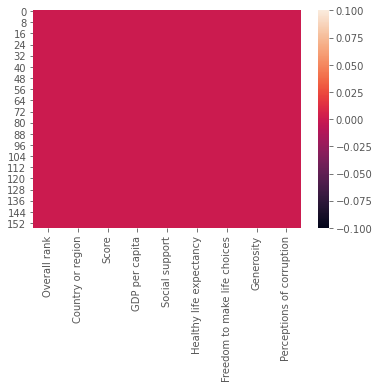

In [13]:
sns.heatmap(df.isnull())

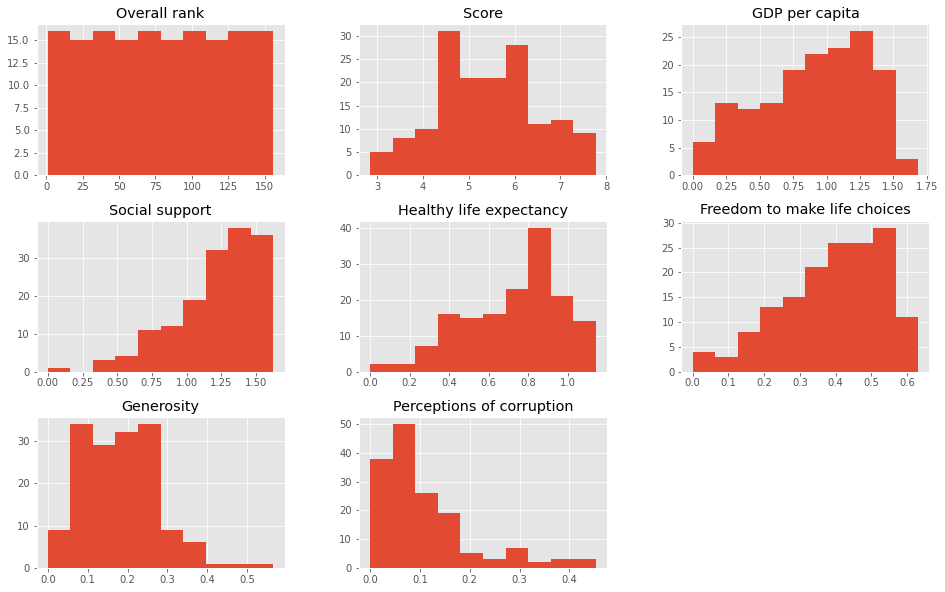

In [14]:
df.hist(figsize=(16,10));

<Figure size 1152x648 with 0 Axes>

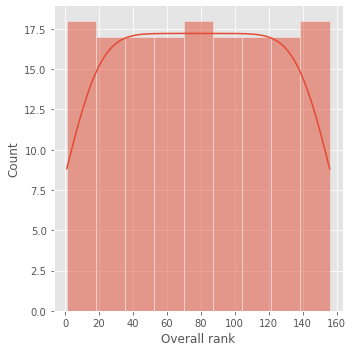

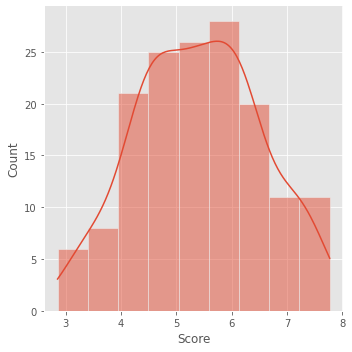

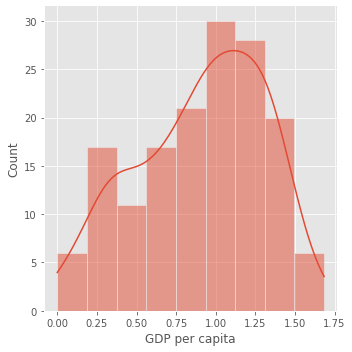

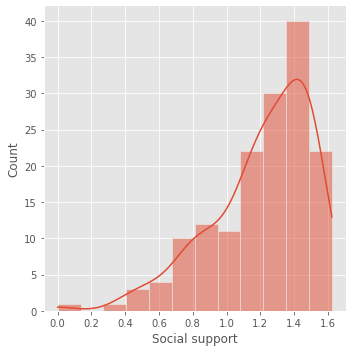

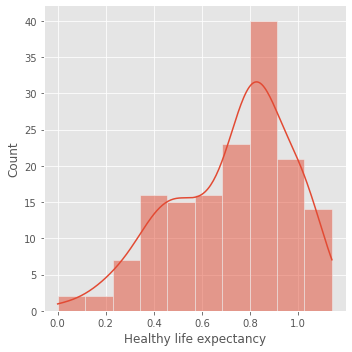

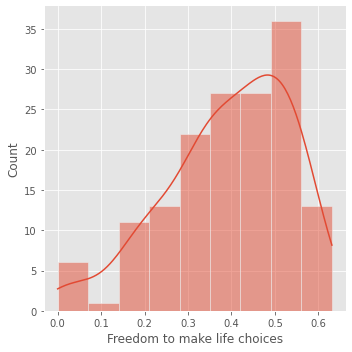

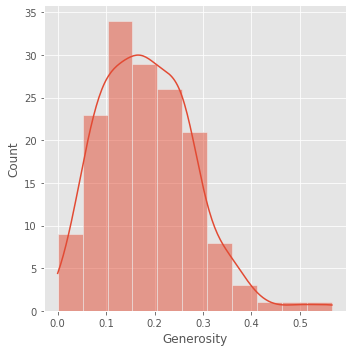

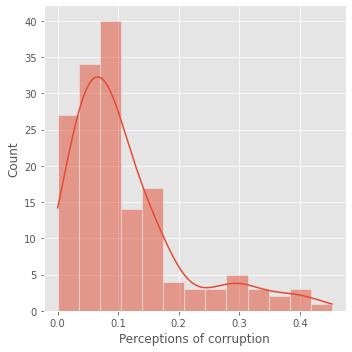

In [15]:
plt.figure(figsize=(16,9))
for i in df.select_dtypes(exclude='object'):
    sns.displot(df[i],kde=True);

In [16]:
outliers_df = pd.DataFrame(columns=df.columns)

for col in df.select_dtypes(include=np.number):
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Total Number of outlier rows: {len(outliers_df)}')


count    156.000000
mean      78.500000
std       45.177428
min        1.000000
25%       39.750000
50%       78.500000
75%      117.250000
max      156.000000
Name: Overall rank, dtype: float64

No outlier found in: Overall rank

Suspected Outliers Lower Bound: -76.5
Suspected Outliers Upper Bound: 233.5


count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

No outlier found in: Score

Suspected Outliers Lower Bound: 2.0845000000000007
Suspected Outliers Upper Bound: 8.644499999999999


count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64

No outlier found in: GDP per capita

Suspected Outliers Lower Bound: -0.34187500000000026
Suspected Outliers Upper Bound: 2.177125


count    156.000000
mean       1.208814


In [19]:
df.dtypes.value_counts()

float64    7
int64      1
object     1
dtype: int64

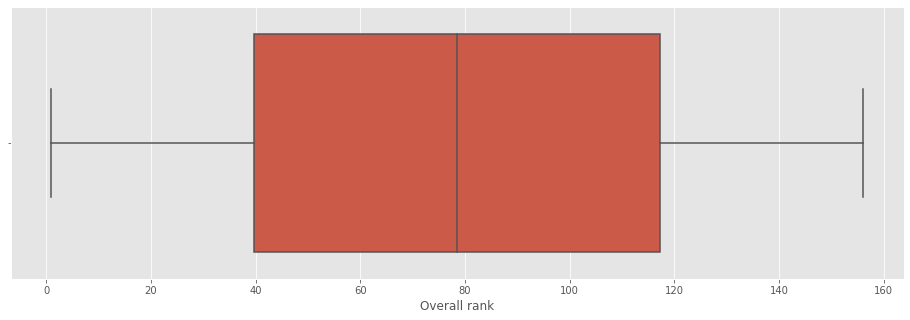

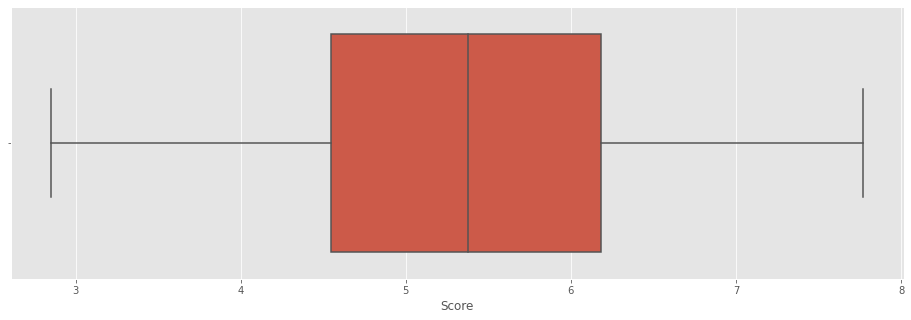

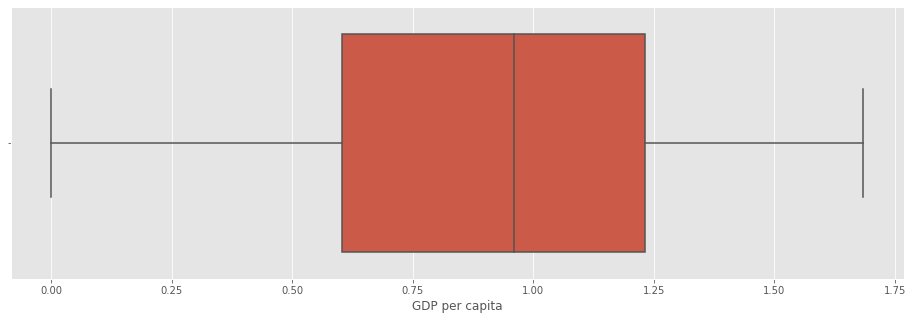

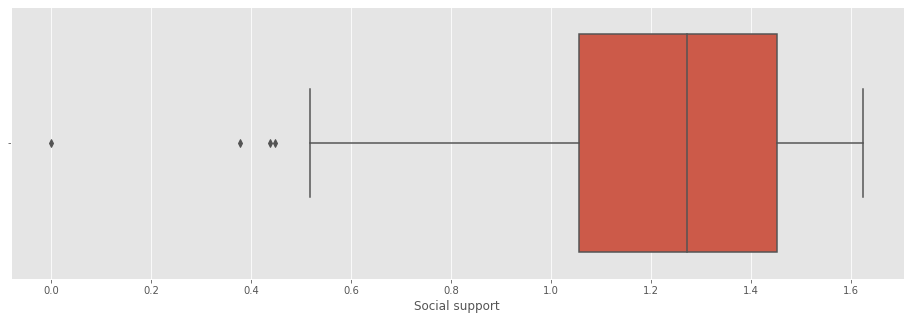

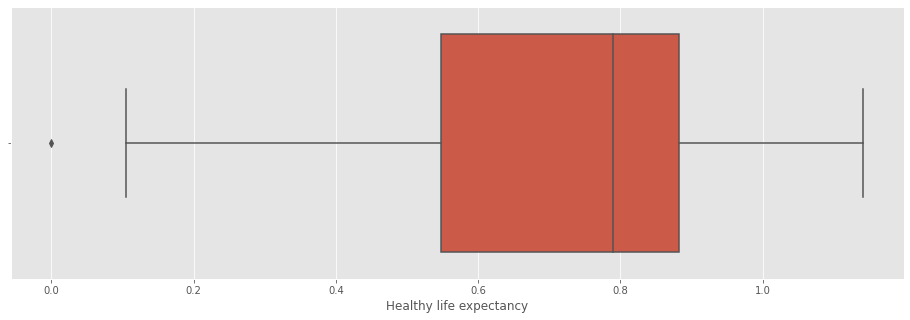

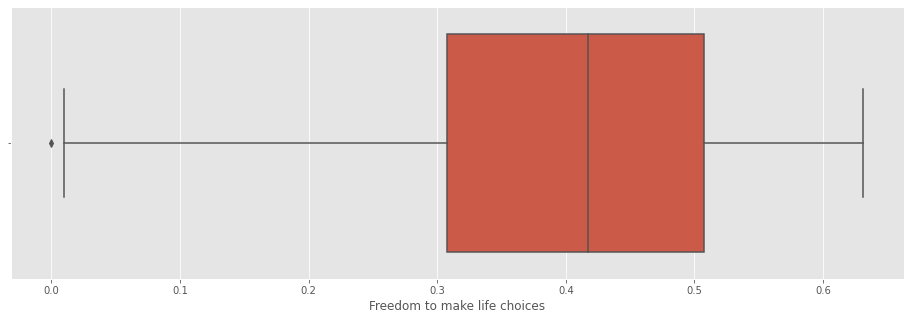

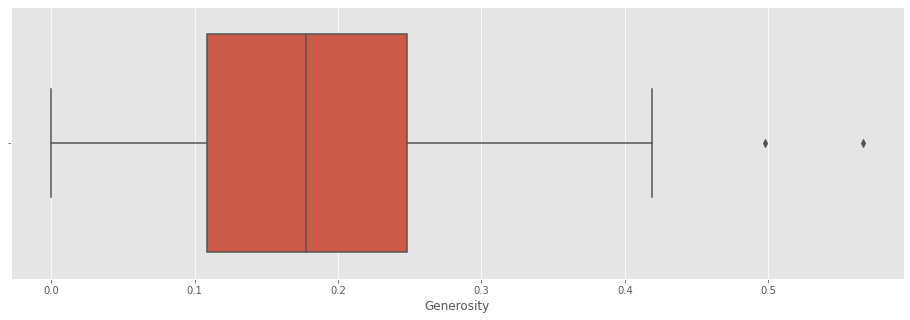

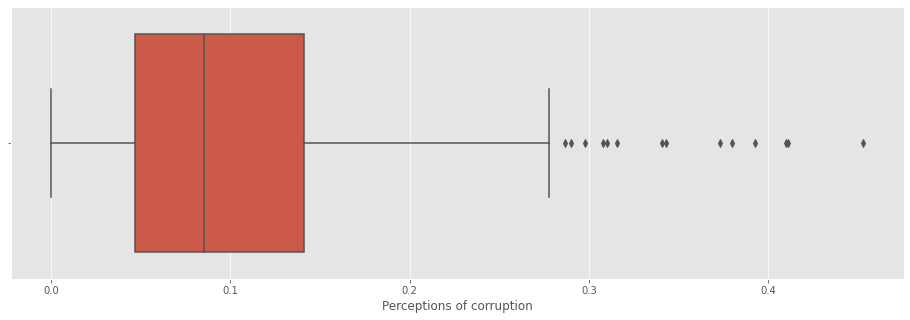

In [30]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(16,5))
        sns.boxplot(data=df1, x=column)

In [31]:
df.sample()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.11


In [33]:
df.corr()['Score']

Overall rank                   -0.989096
Score                           1.000000
GDP per capita                  0.793883
Social support                  0.777058
Healthy life expectancy         0.779883
Freedom to make life choices    0.566742
Generosity                      0.075824
Perceptions of corruption       0.385613
Name: Score, dtype: float64

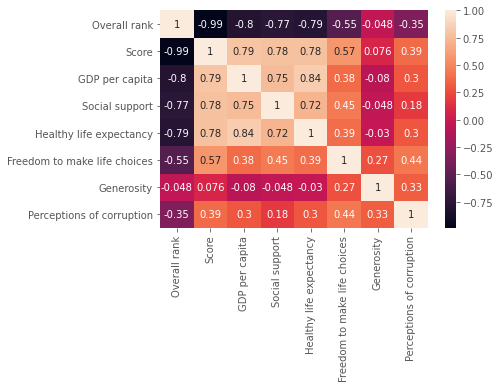

In [35]:
sns.heatmap(df.corr(),annot=True);

In [36]:
df.drop(columns=['Overall rank','Generosity'],inplace=True)

In [37]:
df.sample()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298


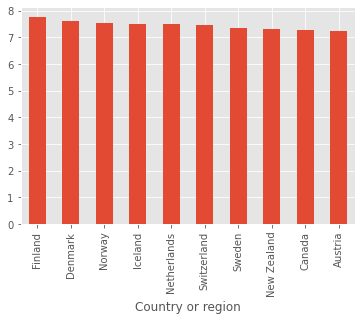

In [40]:
df.groupby('Country or region')['Score'].sum().sort_values(ascending=False).head(10).plot(kind='bar');

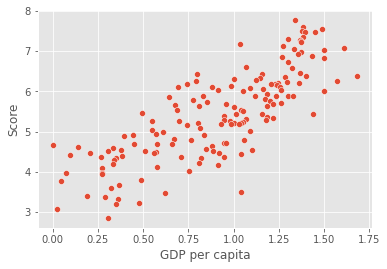

In [42]:
sns.scatterplot(data=df,x='GDP per capita',y='Score');

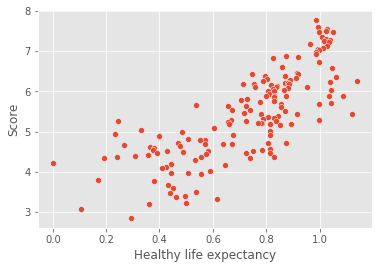

In [43]:
sns.scatterplot(data=df,x='Healthy life expectancy',y='Score');

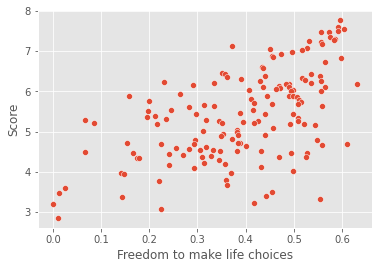

In [44]:
sns.scatterplot(data=df,x='Freedom to make life choices',y='Score');

In [45]:
df.sample()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
126,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.053


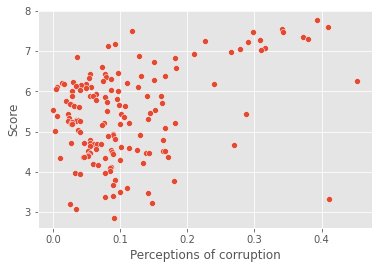

In [46]:
sns.scatterplot(data=df,x='Perceptions of corruption',y='Score');

In [89]:
num_feature = df.drop('Score',axis=1).select_dtypes(exclude='object').columns
cat_feature = df.select_dtypes(include='object').columns

In [90]:
num_feature

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')

In [91]:
cat_feature

Index(['Country or region'], dtype='object')

In [92]:
numeric_transformer = Pipeline(
     steps=[ ("imputer", SimpleImputer(strategy='median'))
               , ("scaler", StandardScaler())
           ]
 )
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [93]:
categorical_transformer = Pipeline(
     steps=[
         ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ("scaler", StandardScaler())
               ]
)
categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])

In [94]:
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, num_feature),
         ("cat", categorical_transformer, cat_feature),
     ]
 )
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Country or region'], dtype='object'))])

In [105]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
            ("model", RandomForestRegressor()
           
           )
          ]
 )


In [106]:
X=df.drop(columns=['Score'])

In [107]:
X.shape

(156, 6)

In [108]:
y=df['Score']

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='r2').mean()

-28.62222118645198

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Country or region'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [112]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

In [113]:
r2_score(y_test,y_pred)

0.7333705628337406

In [114]:
r2_score(y_train,y_train_pred)

0.9715841028461786